In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd


In [8]:

# Load the MNIST dataset from OpenML
mnist = fetch_openml('mnist_784', version=1, as_frame=True)



In [9]:
# The features (images in flattened form) and target (digit labels)
X = mnist.data  # Features: each image as a flattened 784-dimensional vector
y = mnist.target.astype('int')  # Target: the labels of the digits




In [10]:
# Preview the data
print(X.shape)  # (70000, 784) - 70,000 images, each with 784 pixels
print(y.shape)  # (70000,) - 70,000 digit labels

(70000, 784)
(70000,)


In [11]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [12]:

# Scale the features to help linear regression converge faster (important for high-dimensional data)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)


LinearRegression()

In [14]:
# Make predictions using the trained model
y_pred = model.predict(X_test_scaled)

# Since we are predicting digit labels (which are integers), round the predictions to the nearest integer
y_pred_rounded = np.round(y_pred).astype(int)


In [15]:
# Evaluate the model's performance using Mean Squared Error and R² score
mse = mean_squared_error(y_test, y_pred_rounded)
r2 = r2_score(y_test, y_pred_rounded)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 248417588269210.66
R² Score: -5.470380960602017e+18


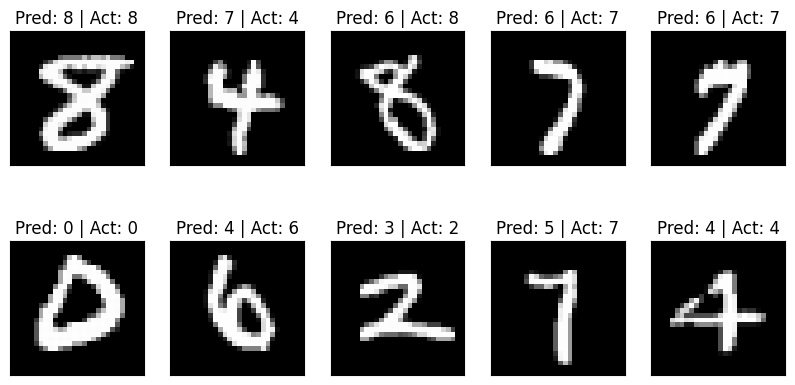

In [16]:
# Plot a few test images along with their predicted and actual labels
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')  # Reshape to 28x28 for visualization
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Pred: {y_pred_rounded[i]} | Act: {y_test.iloc[i]}")

plt.show()
